## Cargar paquetes

In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

## Leer base de datos de Pasajeros

In [4]:
url = 'https://raw.githubusercontent.com/Chefi/Modelos-de-Control-de-Producci-n/refs/heads/main/airline-passengers.csv'

In [6]:
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df

,Total_passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
df.columns =["Pasajeros"]
df.index.freq = 'MS'

## Media Móvil

In [11]:
# Crear media móvil simple de 6 meses
df["SMA fast"] = df["Pasajeros"].rolling(6).mean()
# Crear media móvil simple de 12 meses
df["SMA slow"] = df["Pasajeros"].rolling(12).mean()

<Axes: xlabel='Month'>

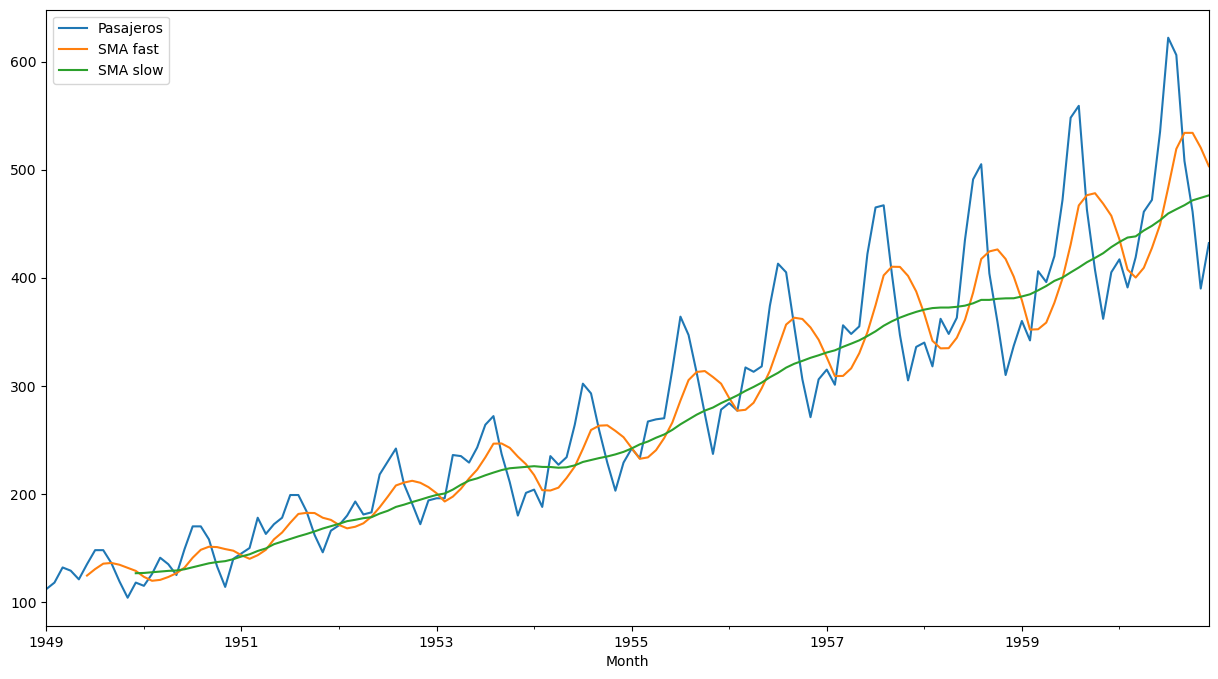

In [13]:
# Plot the results
df[["Pasajeros", "SMA fast", "SMA slow"]].plot(figsize=(15,8))

In [15]:
df.tail()

,Pasajeros,SMA fast,SMA slow
Month,,,
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333
1960-11-01,390,520.333333,473.916667
1960-12-01,432,503.166667,476.166667


## Otro ejemplo

### Leemos los datos

In [18]:
url = 'https://raw.githubusercontent.com/Chefi/Modelos-de-Control-de-Producci-n/refs/heads/main/shampoo.csv'

In [20]:
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df

C:\Users\ftorr\AppData\Local\Temp\ipykernel_31256\2174670022.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, index_col="Month", parse_dates=True)


,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


### Asigna el índice de frecuencia, en este caso mensual

In [22]:
df.index.freq = 'MS'

In [24]:
df

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


### Dibuja la serie

<Axes: xlabel='Month'>

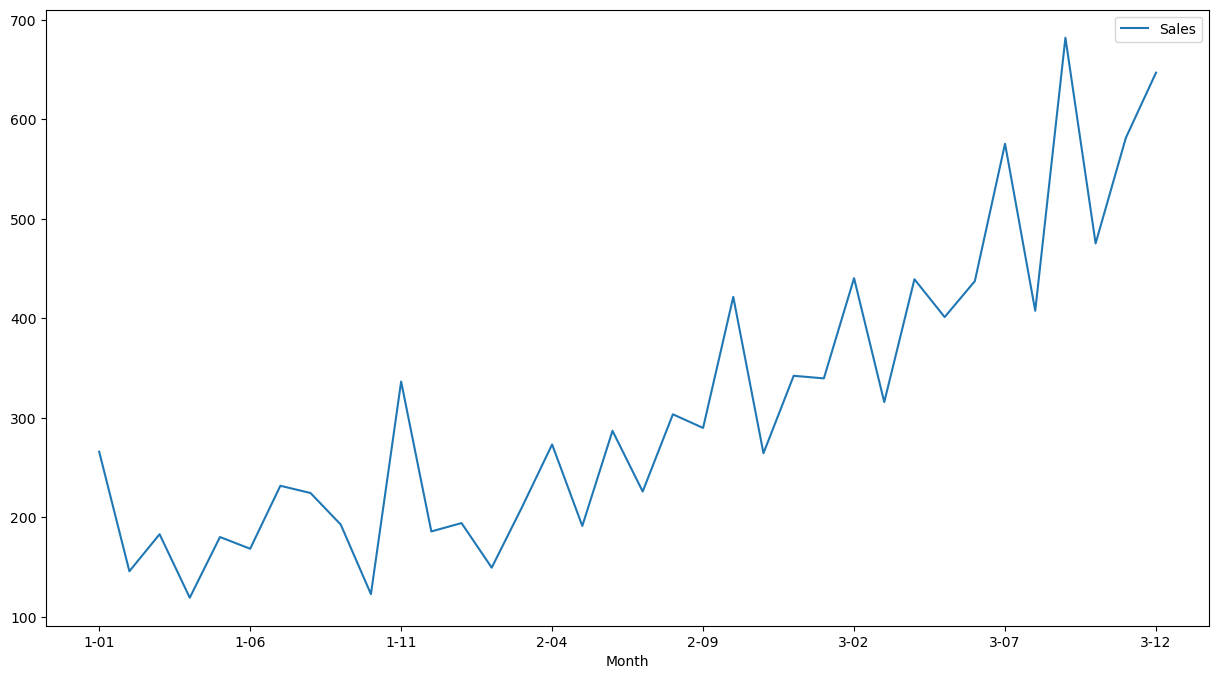

In [26]:
df[["Sales"]].plot(figsize=(15,8))

### Realiza el pronóstico deslizante de promedio móvil

In [28]:
# Crear media móvil simple de 6 meses
df["SMA fast"] = df["Sales"].rolling(6).mean().shift(1)
# Crear media móvil simple de 12 meses
df["SMA slow"] = df["Sales"].rolling(12).mean().shift(1)

<Axes: xlabel='Month'>

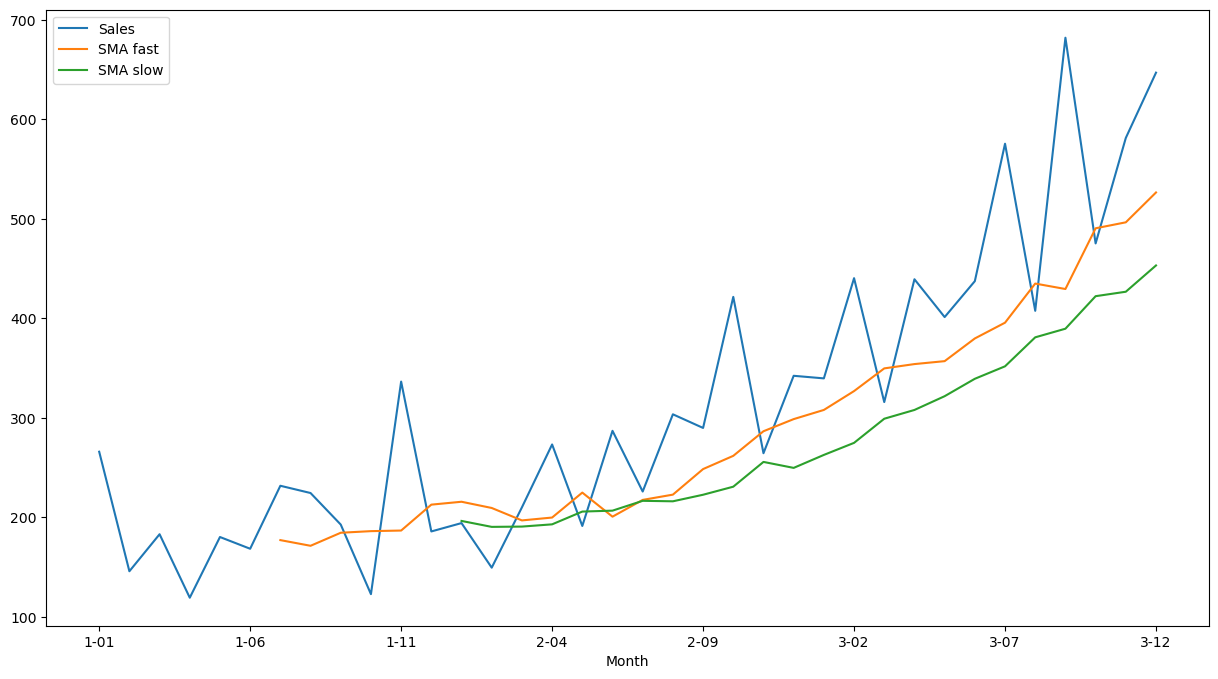

In [30]:
# Plot the results
df[["Sales", "SMA fast", "SMA slow"]].plot(figsize=(15,8))

In [32]:
df

,Sales,SMA fast,SMA slow
Month,,,
1-01,266.0,NaN,NaN
1-02,145.9,NaN,NaN
1-03,183.1,NaN,NaN
1-04,119.3,NaN,NaN
1-05,180.3,NaN,NaN
1-06,168.5,NaN,NaN
1-07,231.8,177.183333,NaN
1-08,224.5,171.483333,NaN
1-09,192.8,184.583333,NaN


### Calcula los errores de pronóstico MAE, MSE,RMSE

In [38]:
# Calculate Mean Absolute Error (MAE)
mae3_1 = mean_absolute_error(df['Sales'][7:], df['SMA fast'][7:])
print(f"Mean Absolute Error (MAE): {mae3_1}")

# Calculate Mean Squared Error (MSE)
mse3_1 = mean_squared_error(df['Sales'][7:], df['SMA fast'][7:])
print(f"Mean Squared Error (MSE): {mse3_1}")

rmse3_1 = np.sqrt(mse3_1)
print(f"Root Mean Squared Error (RMSE): {rmse3_1}")

Mean Absolute Error (MAE): 68.65229885057471
Mean Squared Error (MSE): 7955.926522988507
Root Mean Squared Error (RMSE): 89.19600059973826


### Define el error de pronóstico para el caso N = 6

In [40]:
df['Error fast'] = df['Sales'] - df['SMA fast']

In [106]:
df

,Sales,SMA fast,SMA slow,Error fast
Month,,,,
1-01,266.0,NaN,NaN,NaN
1-02,145.9,NaN,NaN,NaN
1-03,183.1,NaN,NaN,NaN
1-04,119.3,NaN,NaN,NaN
1-05,180.3,NaN,NaN,NaN
1-06,168.5,NaN,NaN,NaN
1-07,231.8,177.183333,NaN,54.616667
1-08,224.5,171.483333,NaN,53.016667
1-09,192.8,184.583333,NaN,8.216667


### Grafica el Histograma del error

Text(0, 0.5, 'Frecuencias')

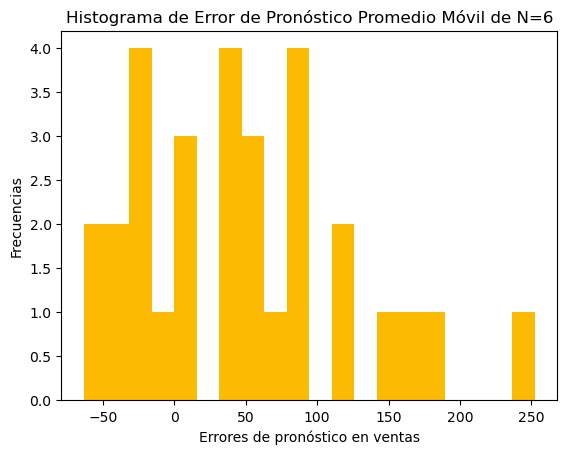

In [48]:
plt.hist(df['Error fast'],  bins=20, color = '#fcba03')
plt.title("Histograma de Error de Pronóstico Promedio Móvil de N=6")
plt.xlabel("Errores de pronóstico en ventas")
plt.ylabel("Frecuencias")

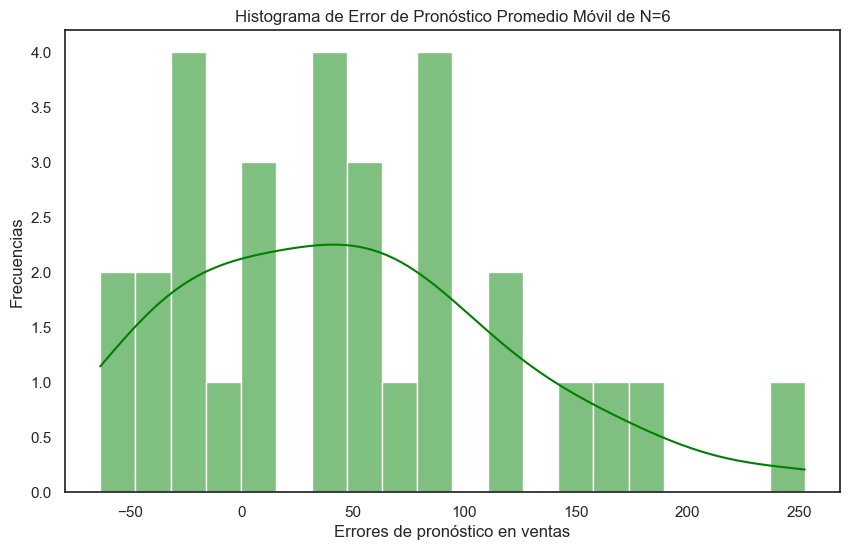

In [97]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.histplot(data=df, x='Error fast', kde=True, bins = 20, color = 'green')
plt.title("Histograma de Error de Pronóstico Promedio Móvil de N=6")
plt.xlabel("Errores de pronóstico en ventas")
plt.ylabel("Frecuencias")
plt.grid(False)
plt.show()